In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

In [1]:
#平移
def move(img,dx=10,dy=10):
    rows,cols= img.shape[:2]
    M0 = np.float32([[1,0,dx],[0,1,dy]])
    dst0 = cv2.warpAffine(img,M0,(cols,rows))
    return dst0
def rotate(img,angle=45):
    rows,cols=img.shape[:2]
    M1=cv2.getRotationMatrix2D((cols/2,rows/2),angle ,1)
    # 第三个参数是输出图像的尺寸
    dst1=cv2.warpAffine(img,M1,(cols,rows),flags=cv2.INTER_LANCZOS4)
    return dst1

<class 'numpy.ndarray'>


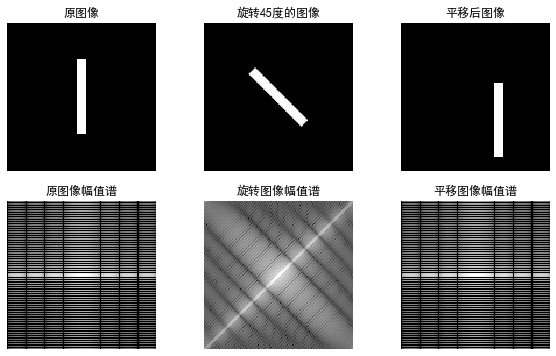

In [3]:
#旋转不变性和平移性
box = np.zeros((128, 128), np.uint8) 
print(type(box))
shape = box.shape
for i in range(shape[0]):
    for j in range(shape[1]):
        if j in range(60, 68) and i in range(32,96):
            box[i,j] = 255
img0=box
img1=rotate(box,45)
img2=move(box,20,20)
dft0 = np.fft.fft2(img0)
dft_shift0=np.fft.fftshift(dft0)
magnitude0= 20*np.log(1+np.abs(dft_shift0))#幅值谱
dft1 = np.fft.fft2(img1)
dft_shift1=np.fft.fftshift(dft1)
magnitude1= 20*np.log(1+np.abs(dft_shift1))#幅值谱
dft2 = np.fft.fft2(img2)
dft_shift2=np.fft.fftshift(dft2)
magnitude2= 20*np.log(1+np.abs(dft_shift2))#幅值谱
       

plt.figure(figsize=(10,6))
plt.subplot(231),plt.imshow(img0, cmap = 'gray')
plt.title('原图像'), plt.axis('off')
plt.subplot(232),plt.imshow(img1, cmap = 'gray')
plt.title('旋转45度的图像'), plt.axis('off')
plt.subplot(233),plt.imshow(img2, cmap = 'gray')
plt.title('平移后图像'), plt.axis('off')

plt.subplot(234),plt.imshow(magnitude0, cmap = 'gray')
plt.title('原图像幅值谱'), plt.axis('off')
plt.subplot(235),plt.imshow(magnitude1, cmap = 'gray')
plt.title('旋转图像幅值谱'), plt.axis('off')
plt.subplot(236),plt.imshow(magnitude2, cmap = 'gray')
plt.title('平移图像幅值谱'), plt.axis('off')

plt.savefig("ch4-12.jpg")
# plt.show()
